In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from PIL import Image

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = '10'

### Entire Training Dataset

In [2]:
df = pd.read_csv('all_data_info.csv')

In [3]:
print(df.shape)
df.head()

(103250, 12)


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [4]:
# number of artists
len(df['artist'].unique())

2319

In [5]:
# missing artist names?
df['artist'].isnull().sum()

0

In [6]:
# num paintings per artist
by_artist = pd.DataFrame(df['artist'].value_counts().reset_index())
by_artist.columns = ['artist','count']
by_artist

,artist,count
0,Ivan Aivazovsky,500
1,John Singer Sargent,500
2,Pierre-Auguste Renoir,500
3,Marc Chagall,500
4,Pablo Picasso,500
...,...,...
2314,Adoration of the Shepherds,1
2315,Dua,1
2316,Transfer Series,1
2317,Portrait of a Woman,1


In [7]:
# number of artists with > 200 paintings
len(by_artist[by_artist['count'] >= 200])

110

In [8]:
# remove data where < 200 paintings per artist
by_artist = by_artist[by_artist['count'] >= 200]

Text(0.5, 0, 'num paintings')

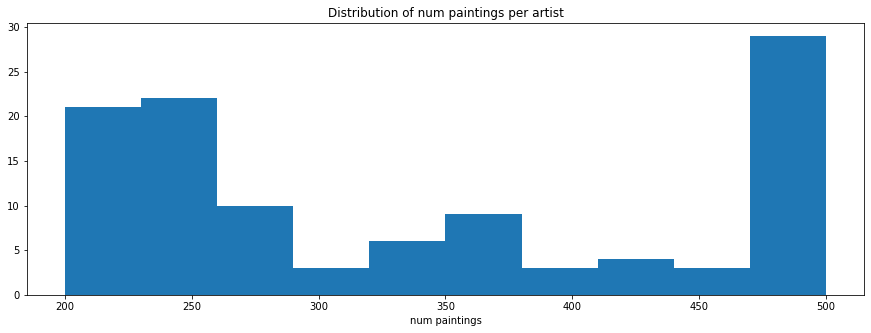

In [45]:
plt.hist(by_artist['count'])
plt.title('Distribution of num paintings per artist')
plt.xlabel('num paintings')

In [10]:
# removing artists from the main df that have < 200 paintings
df_200 = df[df['artist'].isin(by_artist['artist'])]

In [11]:
df_200.shape # 37452 rows

(37452, 12)

In [20]:
df_200['artist'].value_counts()

Ivan Aivazovsky           500
Rembrandt                 500
Zdislav Beksinski         500
Ilya Repin                500
John Singer Sargent       500
                         ... 
Honore Daumier            206
Ilya Mashkov              203
Thomas Lawrence           203
Paul Klee                 200
James McNeill Whistler    200
Name: artist, Length: 110, dtype: int64

### Subset: Train 1

In [12]:
# entire training set to large so downloading subset train 1
filenames_train1 = []
with zipfile.ZipFile('train_1.zip', 'r') as zip:
    for info in zip.infolist():
        name = info.filename.split('/')
        filenames_train1.append(name[1])

In [21]:
train1_df = df[df['new_filename'].isin(filenames_train1)] 

In [22]:
train1_df.reset_index(inplace=True)

In [23]:
train1_df.head()

,index,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,23,Jan van Eyck,1439,religious painting,4000.0,8311.0,28783029.0,wikiart,Northern Renaissance,The Madonna in the Church,train_and_test,True,16876.jpg
2,42,Thomas Gainsborough,1783,landscape,5712.0,4704.0,11791905.0,wikiart,Rococo,The Mall in St. James's Park,train_and_test,True,1164.jpg
3,46,Lyonel Feininger,1926.0,cityscape,4472.0,5894.0,7382419.0,wikiart,Cubism,Gelmeroda IX,train_only,True,19385.jpg
4,74,Henri de Toulouse-Lautrec,1895,genre painting,5833.0,3985.0,3389831.0,wikiart,Post-Impressionism,Abandonment (The pair),train_and_test,True,17354.jpg


In [33]:
train1_df.shape

(11025, 13)

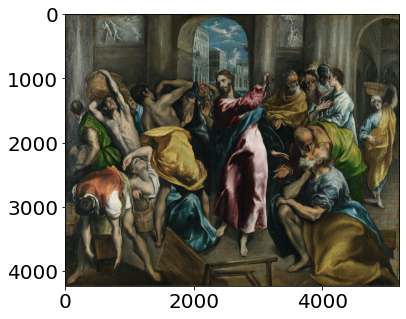

In [34]:
# looking at some images
archive = zipfile.ZipFile('train_1.zip', 'r')
file = train1_df.loc[5]['new_filename']
imgdata = archive.open('train_1/'+file)
img = Image.open(imgdata)
plt.imshow(img)
plt.show()

In [35]:
train1_df['artist'].value_counts().head(10)

Boris Kustodiev               70
Ilya Repin                    60
Ivan Aivazovsky               59
Eugene Boudin                 58
Odilon Redon                  58
Albrecht Durer                58
Pierre-Auguste Renoir         58
Nicholas Roerich              58
Ivan Shishkin                 56
Giovanni Battista Piranesi    55
Name: artist, dtype: int64

__largest number of paintings per artist in train_1 is 70 (compared to 500 in entire training data)__

In [37]:
by_artist_1 = pd.DataFrame(train1_df['artist'].value_counts().reset_index())
by_artist_1 .columns = ['artist','count']
by_artist_1

,artist,count
0,Boris Kustodiev,70
1,Ilya Repin,60
2,Ivan Aivazovsky,59
3,Eugene Boudin,58
4,Odilon Redon,58
...,...,...
1495,Rolf Amstrong,1
1496,from The Tempest,1
1497,Homer Watson,1
1498,Electrique transparence,1


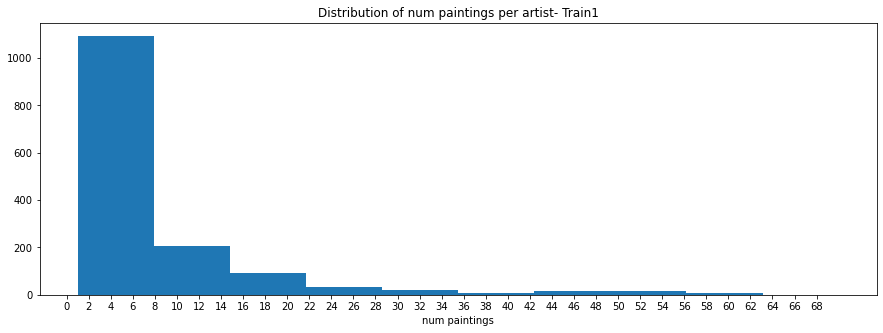

In [46]:
plt.hist(by_artist_1['count'])
plt.title('Distribution of num paintings per artist- Train1')
plt.xlabel('num paintings')
plt.xticks(range(0, 70,2))
plt.show()

In [47]:
# number of artists with > 20 paintings
len(by_artist_1[by_artist_1['count'] >= 20])

127

In [69]:
by_artist_1 = by_artist_1[by_artist_1['count'] >= 20]
# removing artists from the main df that have < 20 paintings
df_20 = train1_df[train1_df['artist'].isin(by_artist_1['artist'])]

In [70]:
print(df_20.shape)
df_20.head()

(4434, 13)


,index,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
4,74,Henri de Toulouse-Lautrec,1895,genre painting,5833.0,3985.0,3389831.0,wikiart,Post-Impressionism,Abandonment (The pair),train_and_test,True,17354.jpg
7,110,William-Adolphe Bouguereau,1892,genre painting,3701.0,5490.0,2026238.0,wikiart,Realism,Leveil Heart,train_and_test,True,19834.jpg
8,129,Koloman Moser,c.1895,illustration,4122.0,4626.0,10196646.0,wikiart,Art Nouveau (Modern),Happy editing. Illustration with self-portrait.,train_and_test,True,15569.jpg
10,141,Koloman Moser,1897,design,3378.0,5448.0,11674658.0,wikiart,Art Nouveau (Modern),Cover design of the first publication of the A...,train_and_test,True,100478.jpg
11,142,Ferdinand Hodler,1879,portrait,3672.0,5004.0,11552440.0,wikiart,Realism,The pastor,train_and_test,True,100829.jpg


__df_20 has data in train_1 with artists having >= 20 paintings (max = 70)__

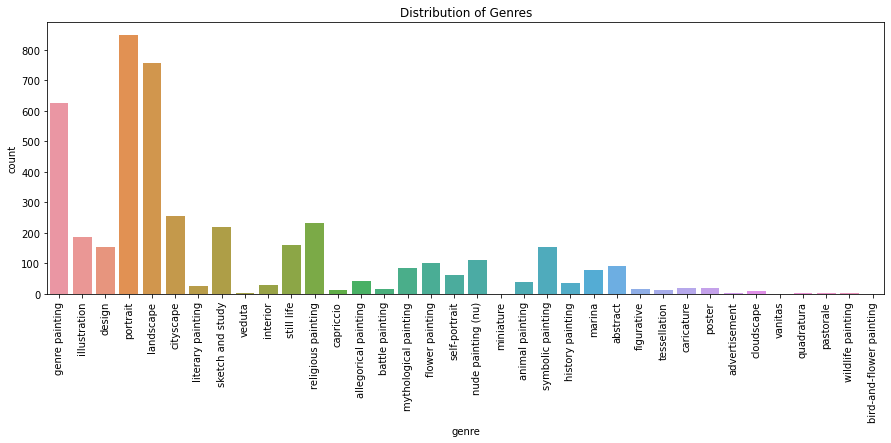

In [71]:
sns.countplot(x='genre', data=df_20)
plt.xticks(rotation=90)
plt.title('Distribution of Genres')
plt.show()

In [74]:
# need to clean date column - has nan and not numeric